# Sentiment Analysis of Twitter accounts to uncover sentiment toward IU

Sentiment analysis comes in three major categrories: a positive, negative or neutral sentiment on the specific topic. 

This Python program is created to determine the sentiment of a writer from a twitter account within an online mention of tweets on topis related to IU (Indiana University). Four specific keywords will be used to get the sentiment on them based on the latest 2000 tweets. The code to collect the corpus of tweets was created based on Al-Masri (2019), Chauhan (2018)

#### We will be using the libraries tweepy, nltk, re, csv, time, pandas, numpy

## Import tweets

#### Initial test of tweepy handler: authenication credentials need to be replaced by the actual Twitter developer

In [1]:
# Import package
import tweepy, json, nltk, re, csv, time, pandas as pd, numpy as np

# Store OAuth authentication credentials in relevant variables
consumer_key = consumer_key 
consumer_secret = consumer_secret
access_token = access_token
access_token_secret =access_token_secret

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


NameError: name 'consumer_key' is not defined

#### Let's persist this process using class and functions

In [2]:
from tweepy import OAuthHandler

class TwitterClient(object):
    def __init__(self):
        # Store OAuth authentication credentials in relevant variables
        consumer_key = consumer_key 
        consumer_secret = consumer_secret
        access_token = access_token
        access_token_secret = access_token_secret
        try: 
            # OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Twitter Authentication Failed - \n{str(e)}") 

    # Function to fetch tweets
    def get_tweets(self, query, maxTweets = 2000): 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100
        
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                    
                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['created_at'] = tweet.created_at                    
                    #parsed_tweet['screen_name'] = tweet.screen_name 
                    #parsed_tweet['location'] = tweet.location 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet)  
   
                
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                print("Tweepy error : " + str(e))
                break  
                
        return pd.DataFrame(tweets)

In [3]:
#import tweets based on the specific keywords

twitter_client = TwitterClient()
key_tweets=['IUBloomington','IndianaUniv','IUHoosiers','IUBarstool']
    
for keys in key_tweets:
    tweets_df = twitter_client.get_tweets(keys)
    tweet_file = open('tweets_%s.csv' % keys, 'w')
    tweets_df.to_csv(r'tweets_%s.csv' % keys)
    tweet_file.close()

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 685 tweets
No more tweets found
Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700

In [4]:
#Combined all the files in the output.csv
filenames = ['tweets_IUBloomington.csv','tweets_IndianaUniv.csv','tweets_IUHoosiers.csv', 'tweets_IUBarstool.csv']
df=pd.DataFrame()
for f in filenames:
    data=pd.read_csv(f)
    df=pd.concat([df,data]).drop_duplicates().reset_index(drop=True)

tweet_file = open('output.csv', 'w')
df.to_csv('output.csv')
tweet_file.close()

In [5]:
df.head()

Unnamed: 0           created_at  \
0           0  2019-12-14 01:35:28   
1           1  2019-12-14 01:33:06   
2           2  2019-12-14 01:06:56   
3           3  2019-12-14 01:05:27   
4           4  2019-12-14 01:02:25   

                                              tweets  
0  @independenceu It‚Äôs a real stretch to call you...  
1  RT @IUBloomington: TONIGHT! \n\n@SNCMusic will...  
2             @IUBloomington https://t.co/7f6g8O3ReF  
3  Straight No Chaser (@ IU Auditorium - @iubloom...  
4  Getting pumped for the @SNCmusic ‚Äúthe Open Bar...

In [6]:
#read the data into the dataframe
df = pd.read_csv("output.csv")

# Preview the first 5 lines of the loaded data 
df.head()

Unnamed: 0  Unnamed: 0.1           created_at  \
0           0             0  2019-12-14 01:35:28   
1           1             1  2019-12-14 01:33:06   
2           2             2  2019-12-14 01:06:56   
3           3             3  2019-12-14 01:05:27   
4           4             4  2019-12-14 01:02:25   

                                              tweets  
0  @independenceu It‚Äôs a real stretch to call you...  
1  RT @IUBloomington: TONIGHT! \n\n@SNCMusic will...  
2             @IUBloomington https://t.co/7f6g8O3ReF  
3  Straight No Chaser (@ IU Auditorium - @iubloom...  
4  Getting pumped for the @SNCmusic ‚Äúthe Open Bar...

In [7]:
#Check for the keyword in a tweet
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Returns a logical pandas Series.
    """
    contains_column = data['tweets'].str.contains(word, case = False)
    
    #contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    #contains_column |= data['quoted_status-text'].str.contains(word, case = False)
    #contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False)
    #contains_column |= data['retweeted_status-text'].str.contains(word, case=False)
    #contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case=False)
    
    return contains_column


### Calculate number of keyword mentions

In [8]:
# Find mentions of @IUBarstool in 'tweets'
IUBarstool = check_word_in_tweet('@IUBarstool',df)

# Print proportion of tweets mentioning #IUBarstool
print("Proportion of @IUBarstool tweets:", np.sum(IUBarstool) / df.shape[0])

Proportion of @IUBarstool tweets: 0.1052060737527115


In [9]:
# Find mentions of @IUHoosiers in 'text'
IUHoosiers = check_word_in_tweet('@IUHoosiers', df)

# Print proportion of tweets mentioning #IUHoosiers
print("Proportion of @IUHoosiers tweets:", np.sum(IUHoosiers) / df.shape[0])

Proportion of @IUHoosiers tweets: 0.3024222704266088


In [10]:
# Find mentions of @IndianaUniv in 'text'
IndianaUniv = check_word_in_tweet('@IndianaUniv', df)

# Print proportion of tweets mentioning #IndianaUniv
print("Proportion of @IndianaUniv tweets:", np.sum(IndianaUniv) / df.shape[0])

Proportion of @IndianaUniv tweets: 0.08206796818510484


In [11]:
# Find mentions of @IUBloomington in 'text'
IUBloomington = check_word_in_tweet('@IUBloomington', df)

# Print proportion of tweets mentioning #IUBloomington
print("Proportion of @IUBloomington tweets:", np.sum(IUBloomington) / df.shape[0])

Proportion of @IUBloomington tweets: 0.3371294287780188


In [12]:
df.shape[0]

5532

In [13]:
(np.sum(IUBarstool)+np.sum(IUHoosiers)+np.sum(IndianaUniv)+np.sum(IUBloomington))/df.shape[0]

0.826825741142444

#### Only 82% of the tweets contain the specified keywords. 18% contain responses that do not carry the keywords

## Creating time series data frame
We will explor Twitter text data to track the prevalence of a word.
Convert the DataFrame into a format which can be handled using pandas time series methods. That can be done by converting the index to a datetime type.

In [14]:
# Print first 5 words from created_at to see the original format of datetime in Twitter data
print(df['created_at'].head())


0    2019-12-14 01:35:28
1    2019-12-14 01:33:06
2    2019-12-14 01:06:56
3    2019-12-14 01:05:27
4    2019-12-14 01:02:25
Name: created_at, dtype: object


### Convert the created_at column to np.datetime object

In [15]:
# Set the index of df to created_at
df = df.set_index('created_at')

In [16]:
#check type of the index
type(df.index[1]) 

str

In [17]:
# Set the type of the index to timestamp
df.index = pd.to_datetime(df.index)

In [18]:
#check type of the index
type(df.index[1]) 

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# Create a IUBarstool column
df['IUBarstool'] = check_word_in_tweet('@IUBarstool', df)

# Create a IUHoosiers column
df['IUHoosiers'] = check_word_in_tweet('@IUHoosiers', df)

# Create IndianaUniv column
df['IndianaUniv'] = check_word_in_tweet('@IndianaUniv',df)

# Create IUBloomington column
df['IUBloomington'] = check_word_in_tweet('@IUBloomington', df)


In [20]:
df.head()

Unnamed: 0  Unnamed: 0.1  \
created_at                                      
2019-12-14 01:35:28           0             0   
2019-12-14 01:33:06           1             1   
2019-12-14 01:06:56           2             2   
2019-12-14 01:05:27           3             3   
2019-12-14 01:02:25           4             4   

                                                                tweets  \
created_at                                                               
2019-12-14 01:35:28  @independenceu It‚Äôs a real stretch to call you...   
2019-12-14 01:33:06  RT @IUBloomington: TONIGHT! \n\n@SNCMusic will...   
2019-12-14 01:06:56             @IUBloomington https://t.co/7f6g8O3ReF   
2019-12-14 01:05:27  Straight No Chaser (@ IU Auditorium - @iubloom...   
2019-12-14 01:02:25  Getting pumped for the @SNCmusic ‚Äúthe Open Bar...   

                     IUBarstool  IUHoosiers  IndianaUniv  IUBloomington  
created_at                                                               
2019-12-14 01:35:28       False       False        False           True  
2019-12-14 01:33:06       False       False        False           True  
2019-12-14 01:06:56       False       False        False           True  
2019-12-14 01:05:27       False       False        False           True  
2019-12-14 01:02:25       False       False        False           True

### Plot mean frequency
Create a per-day total number of the mentions of four keywords and plot them across time. 
First create proportions from the boolean Series by the day, then plot them.

In [21]:
import matplotlib.pyplot as plt 

# Sum of IUBarstool column by day
sum_IUBarstool = df['IUBarstool'].resample('1 d').sum()

# Sum of IUHoosiers column by day
sum_IUHoosiers = df['IUHoosiers'].resample('1 d').sum()

# Sum of IndianaUniv column by day
sum_IndianaUniv = df['IndianaUniv'].resample('1 d').sum()

# Sum of IUBloomington column by day
sum_IUBloomington = df['IUBloomington'].resample('1 d').sum()


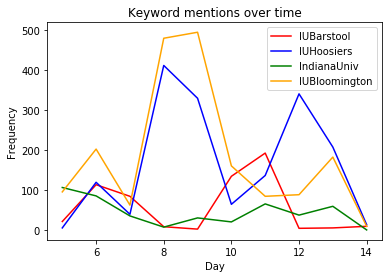

In [22]:
# Plot sum by day
plt.plot(sum_IUBarstool.index.day, sum_IUBarstool, color = 'red')
plt.plot(sum_IUHoosiers.index.day, sum_IUHoosiers, color='blue')
plt.plot(sum_IndianaUniv.index.day, sum_IndianaUniv, color='green')
plt.plot(sum_IUBloomington.index.day, sum_IUBloomington, color='orange')

# Add labels and show
plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('Keyword mentions over time')
plt.legend(('IUBarstool', 'IUHoosiers', 'IndianaUniv','IUBloomington'))
plt.show()


## Sentiment analysis 
We will explore the meaning of the text 

In [23]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#Generate sentiment scores and store them in the sentiment_scores
df['sentiment_scores'] = df['tweets'].apply(sid.polarity_scores)

In [24]:
df.head()

Unnamed: 0  Unnamed: 0.1  \
created_at                                      
2019-12-14 01:35:28           0             0   
2019-12-14 01:33:06           1             1   
2019-12-14 01:06:56           2             2   
2019-12-14 01:05:27           3             3   
2019-12-14 01:02:25           4             4   

                                                                tweets  \
created_at                                                               
2019-12-14 01:35:28  @independenceu It‚Äôs a real stretch to call you...   
2019-12-14 01:33:06  RT @IUBloomington: TONIGHT! \n\n@SNCMusic will...   
2019-12-14 01:06:56             @IUBloomington https://t.co/7f6g8O3ReF   
2019-12-14 01:05:27  Straight No Chaser (@ IU Auditorium - @iubloom...   
2019-12-14 01:02:25  Getting pumped for the @SNCmusic ‚Äúthe Open Bar...   

                     IUBarstool  IUHoosiers  IndianaUniv  IUBloomington  \
created_at                                                                
2019-12-14 01:35:28       False       False        False           True   
2019-12-14 01:33:06       False       False        False           True   
2019-12-14 01:06:56       False       False        False           True   
2019-12-14 01:05:27       False       False        False           True   
2019-12-14 01:02:25       False       False        False           True   

                                                      sentiment_scores  
created_at                                                              
2019-12-14 01:35:28  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2019-12-14 01:33:06  {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...  
2019-12-14 01:06:56  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2019-12-14 01:05:27  {'neg': 0.168, 'neu': 0.687, 'pos': 0.145, 'co...  
2019-12-14 01:02:25  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

#### Use the compound sentiment score to label the tweets as positive or negative

In [25]:
compound=[]
pos=[]
neg=[]

for row in df.itertuples():
        compound.append(row.sentiment_scores['compound'])
        pos.append(row.sentiment_scores['compound']> 0.1)
        neg.append(row.sentiment_scores['compound']<- 0.1)
        
df['sentiment']=compound
df['positive']=pos
df['negative']=neg
df.head()



Unnamed: 0  Unnamed: 0.1  \
created_at                                      
2019-12-14 01:35:28           0             0   
2019-12-14 01:33:06           1             1   
2019-12-14 01:06:56           2             2   
2019-12-14 01:05:27           3             3   
2019-12-14 01:02:25           4             4   

                                                                tweets  \
created_at                                                               
2019-12-14 01:35:28  @independenceu It‚Äôs a real stretch to call you...   
2019-12-14 01:33:06  RT @IUBloomington: TONIGHT! \n\n@SNCMusic will...   
2019-12-14 01:06:56             @IUBloomington https://t.co/7f6g8O3ReF   
2019-12-14 01:05:27  Straight No Chaser (@ IU Auditorium - @iubloom...   
2019-12-14 01:02:25  Getting pumped for the @SNCmusic ‚Äúthe Open Bar...   

                     IUBarstool  IUHoosiers  IndianaUniv  IUBloomington  \
created_at                                                                
2019-12-14 01:35:28       False       False        False           True   
2019-12-14 01:33:06       False       False        False           True   
2019-12-14 01:06:56       False       False        False           True   
2019-12-14 01:05:27       False       False        False           True   
2019-12-14 01:02:25       False       False        False           True   

                                                      sentiment_scores  \
created_at                                                               
2019-12-14 01:35:28  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2019-12-14 01:33:06  {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...   
2019-12-14 01:06:56  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2019-12-14 01:05:27  {'neg': 0.168, 'neu': 0.687, 'pos': 0.145, 'co...   
2019-12-14 01:02:25  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

                     sentiment  positive  negative  
created_at                                          
2019-12-14 01:35:28     0.0000     False     False  
2019-12-14 01:33:06     0.4926      True     False  
2019-12-14 01:06:56     0.0000     False     False  
2019-12-14 01:05:27    -0.0772     False     False  
2019-12-14 01:02:25     0.0000     False     False

#### Store the data for future analysis

In [26]:
#write data to the file
tweet_file = open('output_sentiment.csv', 'w')
df.to_csv('output_sentiment.csv')
tweet_file.close()

In [27]:
df[(df['IUBloomington'] & df['positive'])].resample('1 d').mean()

Unnamed: 0  Unnamed: 0.1  IUBarstool  IUHoosiers  IndianaUniv  \
created_at                                                                   
2019-12-05  2104.266667   1570.933333         0.0    0.066667     0.266667   
2019-12-06  1657.378378   1576.297297         0.0    0.000000     0.054054   
2019-12-07  2044.270270   1463.729730         0.0    0.432432     0.054054   
2019-12-08  2317.767442   1318.697674         0.0    0.744186     0.000000   
2019-12-09  2059.162162   1019.027027         0.0    0.756757     0.000000   
2019-12-10   977.723404    634.957447         0.0    0.255319     0.000000   
2019-12-11   412.710526    412.710526         0.0    0.000000     0.000000   
2019-12-12   495.000000    327.187500         0.0    0.125000     0.000000   
2019-12-13   107.567164    107.567164         0.0    0.000000     0.000000   
2019-12-14   805.000000      5.000000         0.0    0.000000     0.000000   

            IUBloomington  sentiment  positive  negative  
created_at                                                
2019-12-05            1.0   0.613493       1.0       0.0  
2019-12-06            1.0   0.597407       1.0       0.0  
2019-12-07            1.0   0.758086       1.0       0.0  
2019-12-08            1.0   0.494817       1.0       0.0  
2019-12-09            1.0   0.492714       1.0       0.0  
2019-12-10            1.0   0.536489       1.0       0.0  
2019-12-11            1.0   0.553995       1.0       0.0  
2019-12-12            1.0   0.535196       1.0       0.0  
2019-12-13            1.0   0.590857       1.0       0.0  
2019-12-14            1.0   0.777000       1.0       0.0

In [28]:
df[(df['IUBloomington'] & df['negative'])].resample('1 d').mean()

Unnamed: 0  Unnamed: 0.1  IUBarstool  IUHoosiers  IndianaUniv  \
created_at                                                                   
2019-12-05  1945.500000   1945.500000         0.0    0.000000     0.000000   
2019-12-06  1719.444444   1497.222222         0.0    0.000000     0.000000   
2019-12-07  1373.000000   1373.000000         0.0    0.000000     0.000000   
2019-12-08  2489.067568   1337.243243         0.0    0.837838     0.027027   
2019-12-09  2068.062500    998.687500         0.0    0.750000     0.000000   
2019-12-10   910.400000    641.900000         0.0    0.200000     0.000000   
2019-12-11   438.833333    438.833333         0.0    0.000000     0.000000   
2019-12-12   927.000000    390.000000         0.0    0.400000     0.000000   
2019-12-13   107.750000    107.750000         0.0    0.000000     0.000000   

            IUBloomington  sentiment  positive  negative  
created_at                                                
2019-12-05            1.0  -0.744000       0.0       1.0  
2019-12-06            1.0  -0.480722       0.0       1.0  
2019-12-07            1.0  -0.439720       0.0       1.0  
2019-12-08            1.0  -0.398520       0.0       1.0  
2019-12-09            1.0  -0.444187       0.0       1.0  
2019-12-10            1.0  -0.399020       0.0       1.0  
2019-12-11            1.0  -0.446700       0.0       1.0  
2019-12-12            1.0  -0.368860       0.0       1.0  
2019-12-13            1.0  -0.305750       0.0       1.0

#### Calculate an average negative and positive sentiment based on the keyword and plot the data

In [29]:
def plot_sentiment(key, data, sentiment): 
    sentiment_data = data[(data[key] & data[sentiment])].resample('1 d').mean()
        
    # Plot mean by day
    plt.plot(sentiment_data.index.day, sentiment_data)
    
    
    # Add labels and show
    plt.xlabel('Day'); plt.ylabel('Frequency')
    plt.title('%s keyword mentions over time' % key)
    plt.legend(('shared %s ' % sentiment, 'direct %s' % sentiment))
    plt.show()

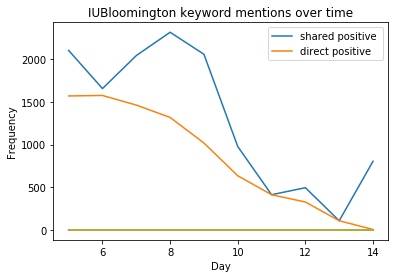

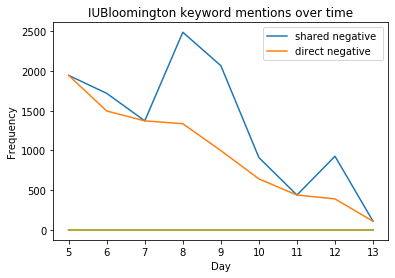

In [30]:
plot_sentiment('IUBloomington', df, 'positive')
plot_sentiment('IUBloomington', df, 'negative')

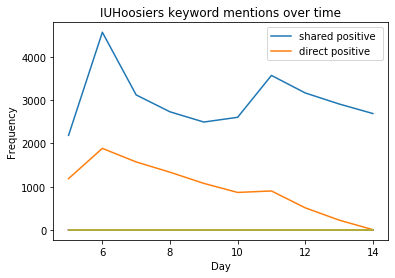

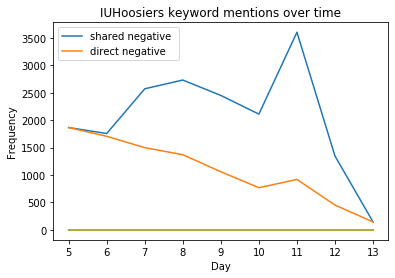

In [31]:
plot_sentiment('IUHoosiers', df, 'positive')
plot_sentiment('IUHoosiers', df, 'negative')

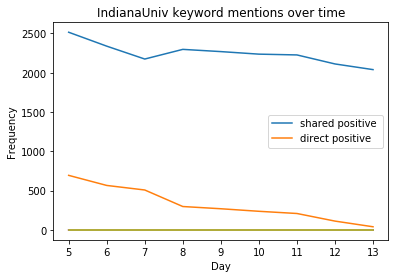

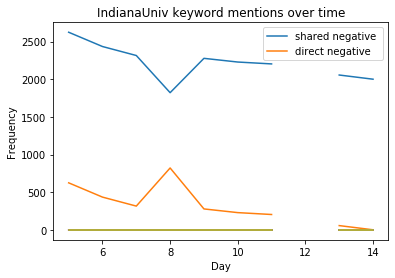

In [32]:
plot_sentiment('IndianaUniv', df,'positive')
plot_sentiment('IndianaUniv', df,'negative')

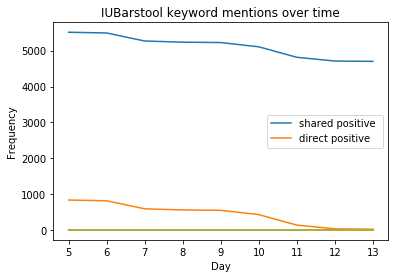

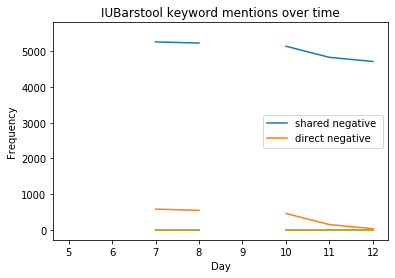

In [33]:
plot_sentiment('IUBarstool', df,'positive')
plot_sentiment('IUBarstool', df,'negative')

## Text analysis

Create a list of tweets

In [35]:
tweets_list= ''.join(df['tweets'])

### Initial WordCloud with udated stopwords

In [36]:
def create_wordcloud(tweets_list, stopword_list):
    # Import the word cloud function and stop words list
    from wordcloud import WordCloud, STOPWORDS 
   
    # Define and update the list of stopwords
    my_stop_words = STOPWORDS.union(stopword_list)
    
    # Create and generate a word cloud image
    my_cloud = WordCloud(background_color='white', stopwords=my_stop_words).generate(tweets_list)

    # Display the generated wordcloud image
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

    # Show the final image
    plt.show()


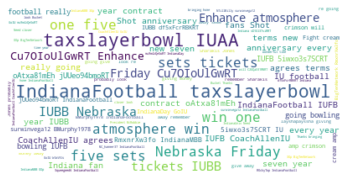

In [37]:
stopword_list=['https','RT', 'co', 'Retweet', 'IUBloomington', 'IUHoosiers','IUBarstool']
create_wordcloud(tweets_list, stopword_list)

### Extract features with Count Vectorizer: Remove Stopwords & Regex

In [38]:
def remove_stopwords(tweets, stop_words):
    # Import the stop words
    from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

    # Define the a new set of stop_words
    my_stop_words = ENGLISH_STOP_WORDS.union(stop_words)

    # Compare standart stop-word list with updated list 
    # Build and fit the vectorizer
    vect1 = CountVectorizer(max_features=1000,stop_words=my_stop_words,token_pattern=r'\b[^\d\W][^\d\W]+\b')
    vect2 = CountVectorizer(max_features=1000,stop_words=ENGLISH_STOP_WORDS) 
    vect1.fit(tweets)
    vect2.fit(tweets)
    
    # Print the features from the first vectorizer
    print(vect1.get_feature_names()[:50])    
    #Print the features from the second vectorizer
    #print(vect2.get_feature_names()[:50])
    
    # Create the bow representation of vect1
    X_review1 = vect1.transform(tweets)    
    # Create the bow representation of vect2
    X_review2 = vect2.transform(tweets)

    # Create the dataframe for 1
    X_df1 = pd.DataFrame(X_review1.toarray(), columns=vect1.get_feature_names())
    print('Top 5 rows using BOW: \n', X_df1.head())
    # Create the dataframe for 2
    X_df2 = pd.DataFrame(X_review2.toarray(), columns=vect2.get_feature_names())
    #print(X_df2.head())  
    
    # Print out the length of each vectorizer
    print('Length of vectorizer 1 (updated stopword list): ', len(vect1.get_feature_names()))
    print('Length of vectorizer 2 (default): ', len(vect2.get_feature_names()))
    print ('Difference:', 
          len(vect2.get_feature_names()),'-', 
           len(vect1.get_feature_names()),
           '=', len(vect2.get_feature_names())-len(vect1.get_feature_names()))
    
    return vect1.get_feature_names() 

In [39]:
stop_words=['https','rt', 'co', 'retweet', 'iubloomington', 'iuhoosiers','iubrstool', '@',
            '‡§Ö‡§ß', '‡§Ö‡§∞', '‡§ó‡§Ø', '‡§§‡§•', '‡§ß‡§®', '‡§®‡§ï', '‡§Æ‡§®', '‡§Ø‡§®‡§¶‡§ï', '‡§∞‡§ñ‡§®', '‡§∞‡§§',
            'ÿµŸàÿ±ÿ©', 'ÿπÿßŸÖ', 'ŸÅŸä', 'ŸÑŸÉŸÖ', 'ŸÑŸÑŸàŸÅÿßÿ°', 'ŸÖÿÆ', 'ŸÖŸÜ', 'ŸÖŸÜÿ∞', 'ŸáÿßŸáŸÖ', 'Ÿáÿ∞Ÿá', 'ŸàÿßŸÑÿ£ŸÑŸÅÿ©', 'ŸàÿßŸÑŸÖÿ≠ÿ®ÿ©', 'ŸàŸÑŸÉŸÜ', 'Ÿäÿ¨ÿ™ŸÖÿπŸàŸÜ', 'Ÿ£Ÿ†',
            'ùïÇùïöùï£ùïúùï®ùï†ùï†ùïï', 'ùïäùï¶ùïüùï§ùïñùï•ùï§', 'ùïïùï†ùï®ùïü', 'ùôéùôöùô£ùôûùô§ùôß', 'ùôéùô•ùôöùôòùôûùôñùô°',
            'zvcrkythw0', 'zvfdvnyyt3', 'zviwb9bny1', 'zwa8cp8pgf', 'zwbfabc6kw', 'zwdlsdgjzy',
            'zx27utwnca', 'zyhr5yz4yd', 'zyiupaoj4a', 'zyznjfvlwg', 'zz36gdxtbv', 'zz3b4vwde7', 'zzaxjlxcue', 
            'zzncbe2z8z', 'able', 'abo', 'aboard', 'abou', 'abroad', 'absolutely', 'abu', 'ac', 'acc', '__knowlej__', '_chrisforrester', '_delalelyo_', '_dgkindy_', '_martyparty__', '_unclejesse__', 'a1hidu4cx1', 'a1sfpw4zyy', 'a3kj5x00ht', 'a8aqsuuwjo', 'a8cmbukrgz', 'a8evewttgq', 'a9yj4zfllb', 'aaas', 'aaron_bennett12', 'ab', 'abbkat8wnv', 'abby', 'abby_mcneely', 
            'aberto','actu', 'actual', 'actually']
remove_stopwords(df.tweets, stop_words)

['academia', 'academic', 'academically', 'accepted', 'accepting', 'access', 'achieving', 'acr', 'act', 'action', 'adapt', 'addition', 'address', 'admissions', 'admitted', 'advocates', 'african', 'afternoon', 'ag_legacy', 'ago', 'agree', 'agrees', 'ahaoeznske', 'ai', 'aidan', 'ain', 'al', 'alex_goldblatt', 'allen', 'allot', 'allvoltan', 'alumni', 'amazing', 'american', 'americans', 'amp', 'anniversary', 'anthropologist', 'aparna_pande', 'applegate', 'application', 'applying', 'approved', 'apukapadia', 'arabia', 'aroundindy', 'arts', 'artsatiu', 'assau', 'assembly']
Top 5 rows using BOW: 
    academia  academic  academically  accepted  accepting  access  achieving  \
0         0         0             0         0          0       0          0   
1         0         0             0         0          0       0          0   
2         0         0             0         0          0       0          0   
3         0         0             0         0          0       0          0   
4         

['academia',
 'academic',
 'academically',
 'accepted',
 'accepting',
 'access',
 'achieving',
 'acr',
 'act',
 'action',
 'adapt',
 'addition',
 'address',
 'admissions',
 'admitted',
 'advocates',
 'african',
 'afternoon',
 'ag_legacy',
 'ago',
 'agree',
 'agrees',
 'ahaoeznske',
 'ai',
 'aidan',
 'ain',
 'al',
 'alex_goldblatt',
 'allen',
 'allot',
 'allvoltan',
 'alumni',
 'amazing',
 'american',
 'americans',
 'amp',
 'anniversary',
 'anthropologist',
 'aparna_pande',
 'applegate',
 'application',
 'applying',
 'approved',
 'apukapadia',
 'arabia',
 'aroundindy',
 'arts',
 'artsatiu',
 'assau',
 'assembly',
 'assistant',
 'associate',
 'atariwomen',
 'athletes',
 'athletic',
 'athletics',
 'atmosphere',
 'attend',
 'attendance',
 'attending',
 'average',
 'awarded',
 'away',
 'awesome',
 'awful',
 'azeemibrahim',
 'babakristian',
 'baby',
 'bad',
 'ball',
 'bank',
 'barstoolstorrs',
 'basically',
 'basketball',
 'bdxltcbccj',
 'beat',
 'beautiful',
 'bells',
 'beloved',
 'best',
 

### Tokenization

In [40]:
def tokenize_tweets(tweets):
    # Import the word tokenizing package
    from nltk import word_tokenize

    # Tokenize the tweets
    word_tokens = [word_tokenize(tweet) for tweet in tweets]
    print('Original tokens: ', word_tokens[0])

    # Filter out non-letter characters
    cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
    print('Cleaned tokens: ', cleaned_tokens[0])

    # Remove characters and digits, i.e. retain only letters
    letters = [[word for word in item if word.isalpha()] for item in cleaned_tokens]

    # Remove characters, i.e. retain only letters and digits
    let_digits = [[word for word in item if word.isalnum()] for item in cleaned_tokens]

    # Remove letters and characters, retain only digits
    digits = [[word for word in item if word.isdigit()] for item in cleaned_tokens]

    '''
    # Print the last item in each list
    print('Last item in alphabetic list: ', letters[2])
    print('Last item in list of alphanumerics: ', let_digits[2])
    print('Last item in the list of digits: ', digits[2])
    '''
    return cleaned_tokens

In [41]:
tokenized_tweets= tokenize_tweets(df.tweets)

Original tokens:  ['@', 'independenceu', 'It', '‚Äô', 's', 'a', 'real', 'stretch', 'to', 'call', 'yourself', '‚Äú', 'IU', '‚Äù', 'when', '@', 'IUBloomington', 'has', 'been', 'called', 'that', 'for', 'what', ',', 'a', 'century', '?']
Cleaned tokens:  ['independenceu', 'It', 's', 'a', 'real', 'stretch', 'to', 'call', 'yourself', 'IU', 'when', 'IUBloomington', 'has', 'been', 'called', 'that', 'for', 'what', 'a', 'century']


### Stemming and Lemmatization with comparing time 
Lemmatized text will be analyzed further

In [42]:
def stemmer_lemmatizer(cleaned_tweets):

    # Import the required packages from nltk
    from nltk.stem import PorterStemmer, WordNetLemmatizer
    from nltk import word_tokenize
    import time

    porter = PorterStemmer()
    WNlemmatizer = WordNetLemmatizer()
    
    cleaned_tweets=' '.join(cleaned_tweets)

    # Tokenize the tweets
    tokens = word_tokenize(cleaned_tweets)

    # Log the start time
    start_time = time.time()

    # Build a stemmed list
    stemmed_tokens = [porter.stem(token) for token in tokens] 

    # Log the end time
    end_time = time.time()

    print('Time taken for stemming in seconds: ', end_time - start_time)
    #print('Stemmed tokens: ', stemmed_tokens) 


    # Log the start time
    start_time = time.time()

    # Build a lemmatized list
    lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

    # Log the end time
    end_time = time.time()

    print('Time taken for lemmatizing in seconds: ', end_time - start_time)
    print('Lemmatized tokens: ', lem_tokens) 

    return lem_tokens

In [44]:
lemmed_tokens= stemmer_lemmatizer( remove_stopwords(df.tweets, stop_words))

['academia', 'academic', 'academically', 'accepted', 'accepting', 'access', 'achieving', 'acr', 'act', 'action', 'adapt', 'addition', 'address', 'admissions', 'admitted', 'advocates', 'african', 'afternoon', 'ag_legacy', 'ago', 'agree', 'agrees', 'ahaoeznske', 'ai', 'aidan', 'ain', 'al', 'alex_goldblatt', 'allen', 'allot', 'allvoltan', 'alumni', 'amazing', 'american', 'americans', 'amp', 'anniversary', 'anthropologist', 'aparna_pande', 'applegate', 'application', 'applying', 'approved', 'apukapadia', 'arabia', 'aroundindy', 'arts', 'artsatiu', 'assau', 'assembly']
Top 5 rows using BOW: 
    academia  academic  academically  accepted  accepting  access  achieving  \
0         0         0             0         0          0       0          0   
1         0         0             0         0          0       0          0   
2         0         0             0         0          0       0          0   
3         0         0             0         0          0       0          0   
4         

In [45]:
#Let's revisit the stopwords and remove them

stop_words=['aaa', 'aaron_bennett', 'abbkat', 'acr', 'acre', 'ad', 'adagtatdca',
            'add', 'addbbghgev', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'adenike',
           '__knowlej__', '_chrisforrester', '_delalelyo_', '_dgkindy_', '_martyparty__', '_unclejesse__', 'ab', 'abby', 'abby_mcneely', 'aberto',
           'able', 'abo', 'abou','actu', 'actual', 'actually','adjenyzbre', 'ga','gi','bu','pa','oop','di','pre','some','pl', 'agree']

#Remove stopwords from the lemmatized list of tweet tokens
tweets_lemmed_stopwords_out= remove_stopwords(lemmed_tokens, stop_words)

['academia', 'academic', 'academically', 'accepted', 'accepting', 'access', 'achieving', 'act', 'action', 'adapt', 'admission', 'admitted', 'advocate', 'african', 'afternoon', 'ag_legacy', 'ago', 'agrees', 'ahaoeznske', 'ai', 'aidan', 'ain', 'al', 'alex_goldblatt', 'allen', 'allot', 'allvoltan', 'alumnus', 'amazing', 'american', 'amp', 'anniversary', 'anthropologist', 'aparna_pande', 'applegate', 'application', 'applying', 'approved', 'apukapadia', 'arabia', 'aroundindy', 'art', 'artsatiu', 'assau', 'assembly', 'assistant', 'associate', 'atariwomen', 'athlete', 'athletic']
Top 5 rows using BOW: 
    academia  academic  academically  accepted  accepting  access  achieving  \
0         1         0             0         0          0       0          0   
1         0         1             0         0          0       0          0   
2         0         0             1         0          0       0          0   
3         0         0             0         1          0       0          0   
4

In [46]:
tokens=','.join(tweets_lemmed_stopwords_out)
tokens

'academia,academic,academically,accepted,accepting,access,achieving,act,action,adapt,admission,admitted,advocate,african,afternoon,ag_legacy,ago,agrees,ahaoeznske,ai,aidan,ain,al,alex_goldblatt,allen,allot,allvoltan,alumnus,amazing,american,amp,anniversary,anthropologist,aparna_pande,applegate,application,applying,approved,apukapadia,arabia,aroundindy,art,artsatiu,assau,assembly,assistant,associate,atariwomen,athlete,athletic,athletics,atmosphere,attend,attendance,attending,average,awarded,away,awesome,awful,azeemibrahim,babakristian,baby,bad,ball,bank,barstoolstorrs,basically,basketball,bdxltcbccj,beat,beautiful,bell,beloved,best,beth_fossen,better,bicentennial,big,biggest,bigtennetwork,biomedical,birthday,bite,blog,bloomington,board,body,bollen,bootsy_collins,botometer,bounce,bounced,bowl,bowling,breast,brentdthacker,briellestarkphd,bring,bringing,bro,brought,btown,bucket,building,business,bxktwlokuk,cada,cake,called,calloway,campus,cance,cancer,candidate,care,career,carillon,carrick

### Word cloud with cleanned out data

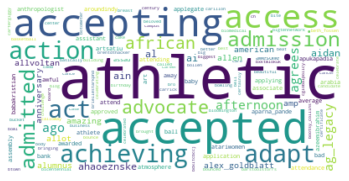

In [47]:
#Create a word cloud with cleanned out data
stop_words=['bring','happen','create','crean','hbcu','include',
           'new','remind','require','thank','write','acc','absolutely'
           'according','iusph','ye', 'account','academic','seme','ro',
           'academia','academically','adequately','ac','abu']
create_wordcloud(tokens, stop_words)

#### Potential for further analysis: Extract features with TFidf Vectorizer

In [68]:
def TFidf_vectorizer(tweets, stop_words):
    
    # Import the required function
    from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
    
    #Create regex pattern
    my_pattern = r'\b[^\d\W][^\d\W]+\b'
    
    # Define and update the list of stopwords
    my_stop_words = ENGLISH_STOP_WORDS.union(stop_words)
    
     # Call the vectorizer and fit it
    tweets_vect = TfidfVectorizer(ngram_range=(1,1), 
                                  max_features=1000, 
                                  token_pattern=my_pattern, 
                                  stop_words = my_stop_words).fit(tweets)

    # Create the tfidf representation
    tweets_tfidf = tweets_vect.transform(tweets)
     
    # Transform to a dataframe and specify the column names
    X=pd.DataFrame(tweets_tfidf.toarray(), columns=tweets_vect.get_feature_names())
    print('Top 5 rows of the DataFrame: ', X.head())
    
    return X


In [69]:
stopword_list=['https','rt', 'co', 'retweet', 'iubloomington', 'iuhoosiers','iubrstool', '@',
            '‡§Ö‡§ß', '‡§Ö‡§∞', '‡§ó‡§Ø', '‡§§‡§•', '‡§ß‡§®', '‡§®‡§ï', '‡§Æ‡§®', '‡§Ø‡§®‡§¶‡§ï', '‡§∞‡§ñ‡§®', '‡§∞‡§§',
            'ÿµŸàÿ±ÿ©', 'ÿπÿßŸÖ', 'ŸÅŸä', 'ŸÑŸÉŸÖ', 'ŸÑŸÑŸàŸÅÿßÿ°', 'ŸÖÿÆ', 'ŸÖŸÜ', 'ŸÖŸÜÿ∞', 'ŸáÿßŸáŸÖ', 'Ÿáÿ∞Ÿá', 'ŸàÿßŸÑÿ£ŸÑŸÅÿ©', 'ŸàÿßŸÑŸÖÿ≠ÿ®ÿ©', 'ŸàŸÑŸÉŸÜ', 'Ÿäÿ¨ÿ™ŸÖÿπŸàŸÜ', 'Ÿ£Ÿ†',
            'ùïÇùïöùï£ùïúùï®ùï†ùï†ùïï', 'ùïäùï¶ùïüùï§ùïñùï•ùï§', 'ùïïùï†ùï®ùïü', 'ùôéùôöùô£ùôûùô§ùôß', 'ùôéùô•ùôöùôòùôûùôñùô°',
            'zvcrkythw0', 'zvfdvnyyt3', 'zviwb9bny1', 'zwa8cp8pgf', 'zwbfabc6kw', 'zwdlsdgjzy',
            'zx27utwnca', 'zyhr5yz4yd', 'zyiupaoj4a', 'zyznjfvlwg', 'zz36gdxtbv', 'zz3b4vwde7', 'zzaxjlxcue', 
            'zzncbe2z8z', 'able', 'abo', 'aboard', 'abou', 'abroad', 'absolutely', 'abu', 'ac', 'acc', '__knowlej__', '_chrisforrester', '_delalelyo_', '_dgkindy_', '_martyparty__', '_unclejesse__', 'a1hidu4cx1', 'a1sfpw4zyy', 'a3kj5x00ht', 'a8aqsuuwjo', 'a8cmbukrgz', 'a8evewttgq', 'a9yj4zfllb', 'aaas', 'aaron_bennett12', 'ab', 'abbkat8wnv', 'abby', 'abby_mcneely', 
            'aberto','actu', 'actual', 'actually', 'bring','happen','create','crean','hbcu','include','new','remind','require','thank','write','acc','absolutely'
            'according','iusph','ye', 'account','academic','seme','ro','academia','academically','adequately','ac','abu']
TFidf_vectorizer(df.tweets, stopword_list)

Top 5 rows of the DataFrame:     accepted  accepting  access  achieving  acr  act  action  adapt  addition  \
0       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0       0.0   
1       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0       0.0   
2       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0       0.0   
3       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0       0.0   
4       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0       0.0   

   address  ...  zcefxihvnu  ÿ•ŸÜÿØŸäÿßŸÜÿß  ÿßŸÉÿ´ÿ±  ÿßŸÑÿµŸàÿ±  ÿßŸÑŸàÿßŸÇÿπŸäÿ©  ÿ®ÿ£ŸÖÿ±ŸäŸÉÿß  \
0      0.0  ...         0.0      0.0   0.0    0.0       0.0      0.0   
1      0.0  ...         0.0      0.0   0.0    0.0       0.0      0.0   
2      0.0  ...         0.0      0.0   0.0    0.0       0.0      0.0   
3      0.0  ...         0.0      0.0   0.0    0.0       0.0      0.0   
4      0.0  ...         0.0      0.0   0.0    0.0       0.0      0.0   

   ÿ®ÿßŸÑÿØŸÉÿ™Ÿàÿ±ÿßŸá  

accepted  accepting  access  achieving  acr  act  action  adapt  \
0          0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
1          0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
2          0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
3          0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
4          0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
...        ...        ...     ...        ...  ...  ...     ...    ...   
5527       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
5528       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
5529       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
5530       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   
5531       0.0        0.0     0.0        0.0  0.0  0.0     0.0    0.0   

      addition  address  ...  zcefxihvnu  ÿ•ŸÜÿØŸäÿßŸÜÿß  ÿßŸÉÿ´ÿ±  ÿßŸÑÿµŸàÿ±  ÿßŸÑŸàÿßŸÇÿπŸäÿ©  \
0          0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
1          0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
2          0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
3          0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
4          0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
...        ...      ...  ...         ...      ...   ...    ...       ...   
5527       0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
5528       0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
5529       0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
5530       0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   
5531       0.0      0.0  ...         0.0      0.0   0.0    0.0       0.0   

      ÿ®ÿ£ŸÖÿ±ŸäŸÉÿß  ÿ®ÿßŸÑÿØŸÉÿ™Ÿàÿ±ÿßŸá  ÿ®ÿπÿØ  ÿ™ÿÆÿ±ÿ¨ŸáŸÖ  ÿ¨ÿßŸÖÿπÿ©  
0         0.0         0.0  0.0     0.0    0.0  
1         0.0         0.0  0.0     0.0    0.0  
2         0.0         0.0  0.0     0.0    0.0  
3         0.0         0.0  0.0     0.0    0.0  
4         0.0         0.0  0.0     0.0    0.0  
...       ...         ...  ...     ...    ...  
5527      0.0         0.0  0.0     0.0    0.0  
5528      0.0         0.0  0.0     0.0    0.0  
5529      0.0         0.0  0.0     0.0    0.0  
5530      0.0         0.0  0.0     0.0    0.0  
5531      0.0         0.0  0.0     0.0    0.0  

[5532 rows x 1000 columns]

Refrerences:

Al-Masri, A.(2019). Creating The Twitter Sentiment Analysis Program in Python with Naive Bayes Classification. Medium, Towards Data Science, 13 Feb. 2019. https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed.

Chauhan, A. (2018). Selenium: Tweepy to Scrap Tweets from Tweeter and Analysing Sentiments. Medium, Towards Data Science, 26 Nov. 2018. https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac.